# Import library

In [ ]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pylab as plt

# Keras is used for validating my own model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

# Download Dataset and Preprocess
Data:  
{adult,mnist,bike}\_{train,test}\_{data,label}   

## Adult dataset
https://archive.ics.uci.edu/ml/datasets/Adult

#### Download Dataset

In [ ]:
!rm -r adult
!mkdir adult
!wget -O ./adult/adult.data https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget -O ./adult/adult.names https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget -O ./adult/adult.test https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

rm: cannot remove 'adult': No such file or directory
--2020-11-18 07:07:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘./adult/adult.data’

./adult/adult.data  100%[===================>]   3.79M  3.60MB/s    in 1.1s    

2020-11-18 07:07:48 (3.60 MB/s) - ‘./adult/adult.data’ saved [3974305/3974305]

--2020-11-18 07:07:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘./adult/adult.names’

./adult/a

#### Dataset Description

**1.age**: continuous.  
**2.workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,   State-gov, Without-pay, Never-worked.  
**3.fnlwgt**: continuous.  
**4.education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
**5.education-num**: continuous.  
**6.marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
**7.occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
**8.relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
**9.race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
**10.sex**: Female, Male.  
**11.capital-gain**: continuous.  
**12.capital-loss**: continuous.  
**13.hours-per-week**: continuous.  
**14.native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  

#### Preprocess

In [ ]:
df = pd.read_csv("./adult/adult.data", header=None)
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','captial-gain','capital-loss','hours-per-week','native-country','label']
adult_train_test_split = df.shape[0]

df.label = df.label.replace(" <=50K",0)
df.label = df.label.replace(" >50K",1)
df.label = df.label.astype(int)

df.sex = df.sex.replace(" Male",0)
df.sex = df.sex.replace(" Female",1)
df.sex = df.sex.astype(int)

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


##### Before

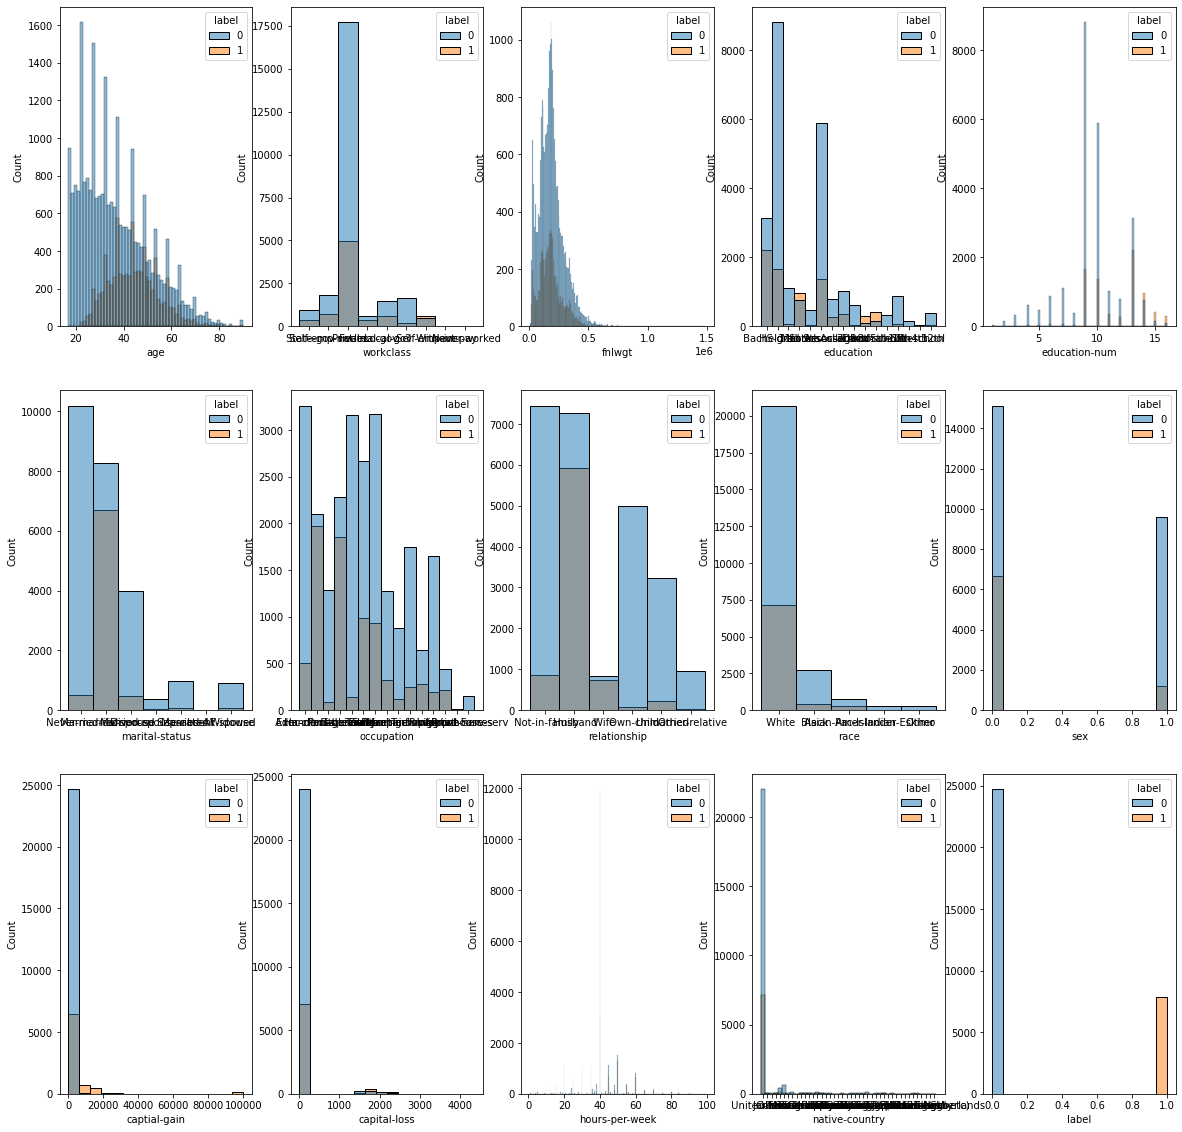

In [ ]:
num_feature = len(df.columns)
ncols = 5
nrows = (num_feature-1)//ncols+1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

col_cnt = 0
row_cnt = 0
for index,feature in enumerate(df):
  sns.histplot(df, x=feature, hue='label', ax=axes[row_cnt][col_cnt])
  col_cnt += 1
  if col_cnt == ncols:
    row_cnt += 1
    col_cnt = 0
plt.show()

##### Process

In [ ]:
df['native-country'] = df['native-country'].where(df['native-country'] == " United-States",0)
df['native-country'] = df['native-country'].where(df['native-country'] != " United-States",1)
df['native-country'] = df['native-country'].astype(int)
df.age = df.age//10
df['hours-per-week'] = df['hours-per-week']//10

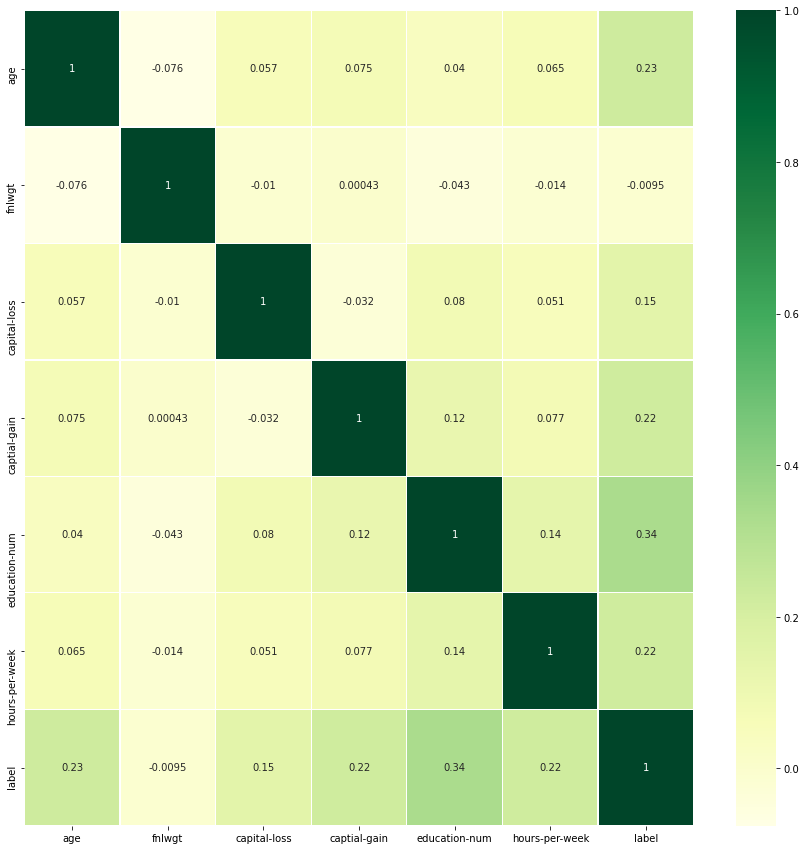

In [ ]:
plt.figure(figsize=(15,15))
# Compare heatmap of numerical feature of drop and not drop

numerical = ['age','fnlwgt','capital-loss','captial-gain','education-num','hours-per-week','label']
heat = df[numerical].corr()
sns.heatmap(heat, linewidth=0.3, cmap="YlGn" ,annot=True)

In [ ]:
df = df.drop(["fnlwgt","workclass","race","native-country"],axis=1)

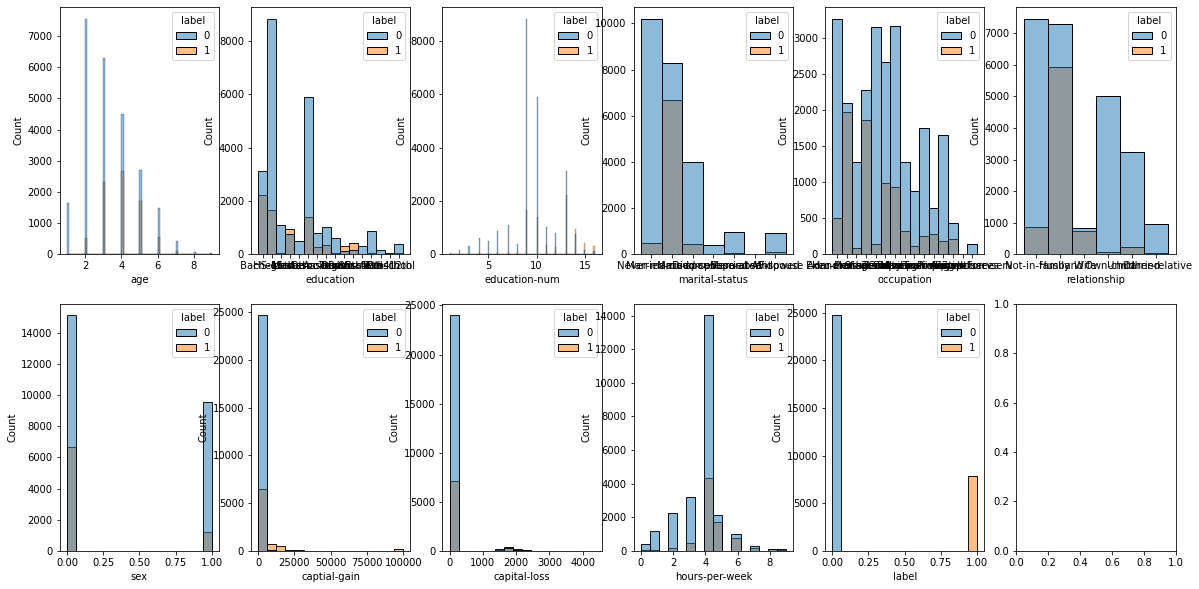

In [ ]:
num_feature = len(df.columns)
ncols = 6
nrows = (num_feature-1)//ncols+1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

col_cnt = 0
row_cnt = 0
for index,feature in enumerate(df):
  sns.histplot(df, x=feature, hue='label', ax=axes[row_cnt][col_cnt])
  col_cnt += 1
  if col_cnt == ncols:
    row_cnt += 1
    col_cnt = 0
plt.show()

In [ ]:
df_test = pd.read_csv("./adult/adult.test", skiprows=1, header=None)
df_test.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','captial-gain','capital-loss','hours-per-week','native-country','label']
df_test.label = df_test.label.replace(" <=50K.",0)
df_test.label = df_test.label.replace(" >50K.",1)
df_test.label = df_test.label.astype(int)

df_test.sex = df_test.sex.replace(" Male",0)
df_test.sex = df_test.sex.replace(" Female",1)
df_test.sex = df_test.sex.astype(int)

df_test['native-country'] = df_test['native-country'].where(df_test['native-country'] == " United-States",0)
df_test['native-country'] = df_test['native-country'].where(df_test['native-country'] != " United-States",1)
df_test.age = df_test.age//10
df_test['hours-per-week'] = df_test['hours-per-week']//10

df_test = df_test.drop(["fnlwgt","workclass","race","native-country"],axis=1)

df_test.head(5)

,age,education,education-num,marital-status,occupation,relationship,sex,captial-gain,capital-loss,hours-per-week,label
0,2,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,0,4,0
1,3,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0,0,0,5,0
2,2,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0,0,0,4,1
3,4,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,7688,0,4,1
4,1,Some-college,10,Never-married,?,Own-child,1,0,0,3,0


In [ ]:
df = df.append(df_test)

one_hot_data = pd.get_dummies(df)

cols = one_hot_data.columns.tolist()
cols.insert(0, cols.pop(cols.index('label')))
one_hot_data = one_hot_data.reindex(columns= cols)

In [ ]:
whole_data = np.array(one_hot_data)

# Split combined data back to train and test, shuffle the training set
adult_train = whole_data[0:adult_train_test_split,:]
np.random.shuffle(adult_train)
adult_train_data = adult_train[:,1:]
adult_train_label = adult_train[:,0]

adult_test = whole_data[adult_train_test_split:-1]
adult_test_data = adult_test[:,1:]
adult_test_label = adult_test[:,0]

In [ ]:
mean = np.mean(adult_train_data,axis=0)
standard = np.std(adult_train_data, axis=0)

adult_train_data = (adult_train_data - mean)/standard
adult_test_data = (adult_test_data - mean)/standard

## Mnist Dataset
http://yann.lecun.com/exdb/mnist/

#### Download Dataset

In [ ]:
!rm -r mnist
!mkdir mnist
!wget -O ./mnist/training_images.gz http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -O ./mnist/training_labels.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -O ./mnist/testing_images.gz http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -O ./mnist/testing_labels.gz http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

rm: cannot remove 'mnist': No such file or directory
--2020-11-18 07:08:01--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 172.67.171.76, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘./mnist/training_images.gz’

./mnist/training_im 100%[===================>]   9.45M  4.76MB/s    in 2.0s    

2020-11-18 07:08:04 (4.76 MB/s) - ‘./mnist/training_images.gz’ saved [9912422/9912422]

--2020-11-18 07:08:04--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 172.67.171.76, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘./mnist/training_labels.gz’

./mnist/t

#### Preprocess

In [ ]:
import gzip

train_img = gzip.open('./mnist/training_images.gz','r')
test_img = gzip.open('./mnist/testing_images.gz','r')
train_label = gzip.open('./mnist/training_labels.gz','r')
test_label = gzip.open('./mnist/testing_labels.gz','r')

image_size = 28
train_num = 60000
test_num = 10000

""" Format training images """
train_img.read(16)
buf = train_img.read(image_size * image_size * train_num)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(train_num, image_size, image_size, 1)
train_data = np.asarray(train_data).squeeze()

""" Format testing images """
test_img.read(16)
buf = test_img.read(image_size * image_size * test_num)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(test_num, image_size, image_size, 1)
test_data = np.asarray(test_data).squeeze()

""" Flattern images """
mnist_train_data = train_data.reshape(train_num,image_size**2)
mnist_test_data = test_data.reshape(test_num,image_size**2)

""" Bound to 0 and 1 """
mnist_train_data /= 255
mnist_test_data /= 255

""" Format training labels """
train_label.read(8)
train_target = np.zeros((train_num))
for i in range(0,train_num):   
    buf = train_label.read(1)
    train_target[i] = int.from_bytes(buf, "big")

test_label.read(8)
test_target = np.zeros((test_num))
for i in range(0,test_num):   
    buf = test_label.read(1)
    test_target[i] = int.from_bytes(buf, "big")

""" Label One hot encoding """
mnist_train_label = np.zeros((train_num, 10))
for i in range(train_target.shape[0]):
  num = int(train_target[i])
  mnist_train_label[i,num] = 1

mnist_test_label = np.zeros((test_num, 10))
for i in range(test_target.shape[0]):
  num = int(test_target[i])
  mnist_test_label[i,num] = 1

## Bike Sharing Dataset
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

#### Download Dataset

In [ ]:
!rm -r bike_sharing
!mkdir bike_sharing
!wget -O ./bike_sharing/bike_sharing.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

rm: cannot remove 'bike_sharing': No such file or directory
--2020-11-18 07:08:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘./bike_sharing/bike_sharing.zip’

./bike_sharing/bike 100%[===================>] 273.43K   528KB/s    in 0.5s    

2020-11-18 07:08:09 (528 KB/s) - ‘./bike_sharing/bike_sharing.zip’ saved [279992/279992]



In [ ]:
!unzip ./bike_sharing/bike_sharing.zip -d ./bike_sharing/

Archive:  ./bike_sharing/bike_sharing.zip
  inflating: ./bike_sharing/Readme.txt  
  inflating: ./bike_sharing/day.csv  
  inflating: ./bike_sharing/hour.csv  


#### Dataset Description

1. instant: record index
2. dteday : date
3. season : season (1:winter, 2:spring, 3:summer, 4:fall)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. hr : hour (0 to 23)
7. holiday : weather day is holiday or not (extracted from [Web Link])
8. weekday : day of the week
9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit :
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
12. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered

#### Preprocess

In [ ]:
df = pd.read_csv("./bike_sharing/hour.csv")
df = df.drop(['instant','dteday','yr'],axis=1)

df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Change workday to: weekend 0, workday 1, holiday 2
df['workingday'] = df['workingday'].where(df['holiday']!=1,2)
df['workingday'] = df['workingday'].astype(object)
df = df.drop(['holiday','weekday'], axis=1)

##### Feature Engineering

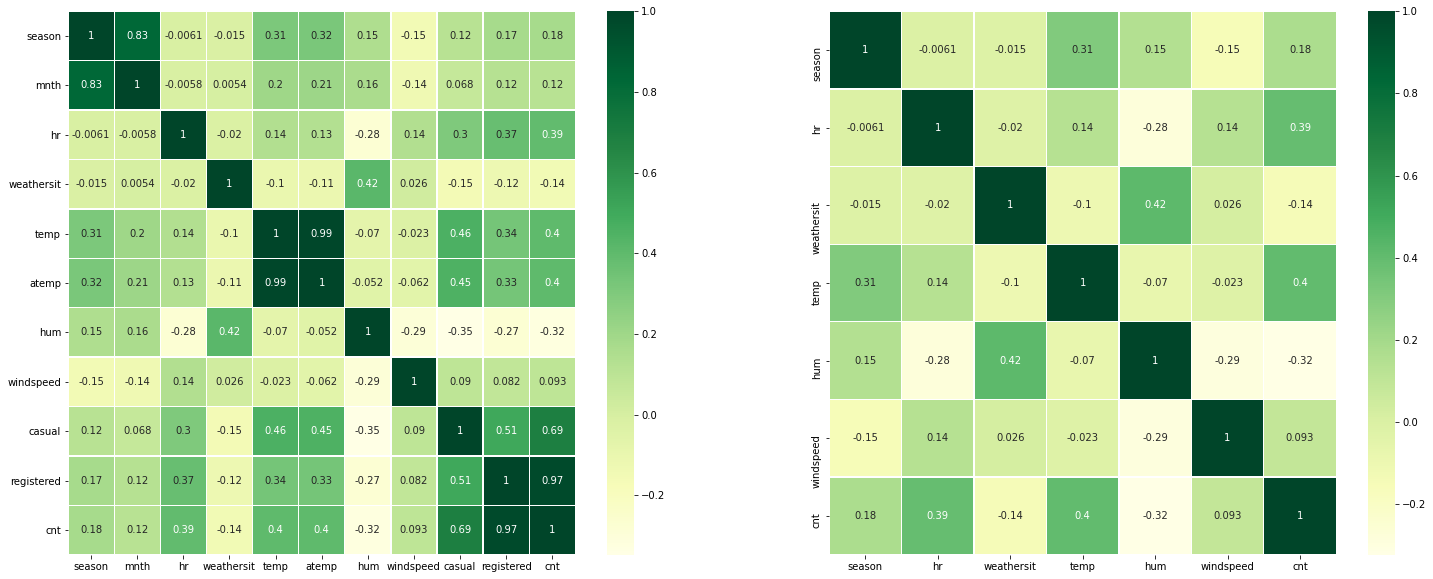

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# Heat map before drop
heat = df.corr()
sns.heatmap(heat, linewidth=0.3, ax=axes[0], cmap="YlGn" ,annot=True)

# Heat map after drop by hand
df = df.drop(['mnth','registered','casual','atemp'],axis=1)
heat2 = df.corr()
sns.heatmap(heat2, linewidth=0.3, ax=axes[1], cmap="YlGn" ,annot=True)

plt.show()

In [ ]:
df = pd.get_dummies(df)

cols = df.columns.tolist()
cols.append(cols.pop(cols.index('cnt')))
df = df.reindex(columns= cols)
df

,season,hr,weathersit,temp,hum,windspeed,workingday_0,workingday_1,workingday_2,cnt
0,1,0,1,0.24,0.81,0.0000,1,0,0,16
1,1,1,1,0.22,0.80,0.0000,1,0,0,40
2,1,2,1,0.22,0.80,0.0000,1,0,0,32
3,1,3,1,0.24,0.75,0.0000,1,0,0,13
4,1,4,1,0.24,0.75,0.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,19,2,0.26,0.60,0.1642,0,1,0,119
17375,1,20,2,0.26,0.60,0.1642,0,1,0,89
17376,1,21,1,0.26,0.60,0.1642,0,1,0,90
17377,1,22,1,0.26,0.56,0.1343,0,1,0,61


##### Format

In [ ]:
whole_data = np.array(df)
np.random.shuffle(whole_data)

# Train-test split
train_test_split = int(whole_data.shape[0]*0.8)
bike_train = whole_data[0:train_test_split,:]
bike_test = whole_data[train_test_split:-1]

# Normalization, in this case, output value is also normalized
bike_mean = np.mean(bike_train,axis=0)
bike_standard = np.std(bike_train, axis=0)

# Both data and label of training set are normalized
bike_train = (bike_train - bike_mean)/bike_standard
bike_train_data = bike_train[:,0:-1]
bike_train_label = bike_train[:,-1]
bike_test_data = bike_test[:,0:-1]

# Only the data of testing set is normalized
bike_test_data = bike_test[:,0:-1]
bike_test_label = bike_test[:,-1]
bike_test_data = (bike_test_data - bike_mean[0:-1])/bike_standard[0:-1]

# NN,RBF v2


## Function class

In [ ]:
class model_func():
  epsilon = 1e-9  # Deal with unstable value
  clip_exp = 700
  """ Activation function """
  @classmethod
  def relu(cls, z):
    return np.maximum(0,z)

  @classmethod
  def d_relu(cls, z):
    return np.where(z<=0, 0, 1)

  @classmethod
  def sigmoid(cls, z):
    z = np.clip(z, -cls.clip_exp, cls.clip_exp)
    return 1/(1+np.exp(-z))

  @classmethod
  def d_sigmoid(cls, z):
    z = np.clip(z, -cls.clip_exp, cls.clip_exp)
    s = 1/(1+np.exp(-z))
    return s*(1-s)

  @classmethod
  def softmax(cls, z):
    tmp_z = z - max(z)
    numerator = np.exp(tmp_z)
    return numerator/np.sum(numerator)

  @classmethod
  def d_softmax(cls, z):
    d_z = np.diag(z)
    for i in range(len(d_z)):
      for j in range(len(d_z)):
        if i == j:
          d_z[i][j] = z[i] * (1-z[i])
        else: 
          d_z[i][j] = -z[i]*z[j]
    return d_z

  @classmethod
  def linear(cls, z):
    return z
  
  @classmethod
  def d_linear(cls, z):
    return 1

  """ Loss function """
  @classmethod
  def mean_squared_error(cls, z, target):
    loss = 0.5*(z - target)**2
    d_loss = z - target
    return loss, d_loss

  @classmethod
  def binary_cross_entropy(cls, z, target):
    z = np.clip(z, cls.epsilon, 1-cls.epsilon)
    if target == 1:
      loss = -np.log(z)
    else:
      loss = -np.log(1-z)
    d_loss = (z-target)/(z*(1-z))
    return loss, d_loss

  @classmethod
  def cross_entropy(cls, z, target):
    z = np.clip(z, cls.epsilon, 1-cls.epsilon)
    loss = -np.sum(target*np.log(z))
    d_loss = -target/z
    return loss, d_loss

  @classmethod
  def softmax_cross_entropy_derivative(cls, z, target):
    z = np.clip(z, cls.epsilon, 1-cls.epsilon)
    loss = -np.sum(target*np.log(z))
    d_loss = z - target
    return loss, d_loss

  """ Accuracy calculation """
  @classmethod
  def binary_accuracy(cls, z, target):
    predict = np.where(z >= 0.5, 1, 0)
    return np.mean(predict==target)

  @classmethod
  def categorical_accuracy(cls, z, target):
    predict = (z == z.max(axis=1)[:,None]).astype(int)
    return np.mean(np.all(predict == target, axis=1)) 

## Full connected layer

In [ ]:
class fc_layer():
  def __init__(self, n_neuron, n_input, activation="relu"):
    self.n_neuron = n_neuron                    # Number of neuron in this FC layer
    self.n_input = n_input+1                    # Number of previous layer neuron, plus 1 bias
    self.z = np.zeros(self.n_neuron)            # Output of each neuron before activation
    self.out = np.zeros(self.n_neuron)           #　Output of each neuron after activation
    self.d_out = np.zeros(self.n_neuron)         #　Derivative of activation
    self.weight = (np.random.randn(self.n_input, self.n_neuron) / np.sqrt(self.n_input)).T # Xavier weight initialization
    self.d_weight = np.zeros((self.n_neuron, self.n_input)) # Delta of weights
    self.bp_z = np.zeros(n_input)               # The output value to next layer during backward path
    self.fp_input = np.zeros(self.n_input)      # The input of layer during fordward path
    self.fp_input[-1] = 1                       # Set bias to constant 1
    self.bp_precal = False

    # Set up activation function
    if activation == "relu":
      self.activation = model_func.relu
      self.d_activation = model_func.d_relu
    elif activation == "sigmoid":
      self.activation = model_func.sigmoid
      self.d_activation = model_func.d_sigmoid
    elif activation == "softmax":
      self.activation = model_func.softmax
      self.d_activation = model_func.d_softmax
    elif activation == "linear":
      self.activation = model_func.linear
      self.d_activation = model_func.d_linear
    else:
      raise RuntimeError("Unknown Activation function {}".format(activation))

  def update_weight(self):
    """ Update weight """
    self.weight = self.weight + self.d_weight
    self.d_weight = np.zeros((self.n_neuron, self.n_input))

  def forward(self, fp_input):
    """ Calculate weight*input value, namely z """
    self.fp_input[0:-1] = fp_input
    self.z = np.dot(self.weight, self.fp_input)
    self.out = self.activation(self.z)
    self.d_out = self.d_activation(self.z)

  def backward(self, bp_input, lr):
    """ Calculate the increment value of weight and the output to next layer during bp """
    if self.bp_precal == False:
      de_dz = bp_input * self.d_out
    else:
      de_dz = bp_input
    self.bp_z = np.dot(self.weight[:,0:-1].T, de_dz)
    d_weight = np.outer(de_dz, self.fp_input)
    self.d_weight = self.d_weight - lr * d_weight

## RBF Layer

In [ ]:
class rbf_Layer():
  def __init__(self, RBF="gaussian", center=None, sigma=None, c_lr=0.001, s_lr=0.001):
    # Parameter attribute
    if RBF == "gaussian":
      self.RBF = self.forward_Gaussian;
      self.backward = self.backward_Gaussian
    elif RBF == "multiquadratic":
      self.RBF = self.forward_Multiquadratic
      self.backward = self.backward_Multiquadratic
    elif RBF == "inverse_multiquadric":
      self.RBF = self.forward_Inverse_Multiquadric
      self.backward = self.backward_Inverse_Multiquadric
    elif RBF == "inverse_quadratic":
      self.RBF = self.forward_Inverse_Quadratic
      self.backward = self.backward_Inverse_Quadratic
    else:
      raise RuntimeError("Unknown RBF kernel {}".format(RBF))
    
    self.c_lr = c_lr
    self.s_lr = s_lr

    if center is not None:
      self.center = center
      self.sigma = sigma
      self.n_neuron = center.shape[0]   # Output shape, prepared for next layer
    
    self.d_center = np.zeros(center.shape) # Accumulated Center change
    self.d_sigma = np.zeros(sigma.shape)  # Accumulated Sigma change
    self.min_data = 1e-9           # Minimum accepted value of RBF
    self.first_input = None         # The previous input
    self.out = np.zeros(center.shape[0])  # Output of the RBF kernel        

  # Update the weight with accumulated value
  def update_weight(self):
    self.center = self.center + self.d_center
    self.d_center = np.zeros(self.center.shape)

    self.sigma = self.sigma + self.d_sigma
    self.d_sigma = np.zeros(self.sigma.shape)

  def forward(self, input):
    self.first_input = input
    self.RBF(input)

  # Different forward RBF kernel
  def forward_Gaussian(self, fp_input):
    var1 = -np.sum((fp_input-self.center)**2, axis=1)/(2*self.sigma**2)
    var2 = np.exp(var1)
    var3 = np.where(var2<=self.min_data, self.min_data, var2)
    self.out = var3

  def forward_Multiquadratic(self, fp_input):
    var1 = np.sqrt(np.sum((fp_input-self.center)**2, axis=1)+self.sigma**2)
    self.out = var1

  def forward_Inverse_Multiquadric(self, fp_input):
    var1 = np.sqrt(np.sum((fp_input-self.center)**2, axis=1)+self.sigma**2)
    self.out = 1/var1

  def forward_Inverse_Quadratic(self, fp_input):
    var1 = np.sum((fp_input-self.center)**2, axis=1)+self.sigma**2
    self.out = 1/var1

  # Different derivative of RBF kernel
  def backward_Gaussian(self, bp_input, lr):
    de_dz = bp_input

    # Calculate center position change
    d_center_var1 = de_dz * self.out
    d_center_var2 = self.center - self.first_input
    d_center = -1 * (d_center_var2.T * (d_center_var1 / self.sigma**2)).T
    self.d_center = self.d_center - lr*self.c_lr*d_center

    # Calculate sigma value change
    d_sigma = d_center_var1 * np.sum((d_center_var2**2),axis=1) / (self.sigma**3)
    self.d_sigma = self.d_sigma - lr*self.s_lr*d_sigma

  def backward_Multiquadratic(self, bp_input, lr):
    de_dz = bp_input

    # Calculate center position change
    d_center = ((self.center - self.first_input).T * (de_dz / self.out)).T
    self.d_center = self.d_center - lr*self.c_lr*d_center

    # Calculate sigma value change
    d_sigma = de_dz * self.sigma / self.out
    self.d_sigma = self.d_sigma - lr*self.s_lr*d_sigma

  def backward_Inverse_Multiquadric(self, bp_input, lr):
    de_dz = bp_input

    # Calculate center position change
    d_center = (-(self.center - self.first_input).T * (de_dz * self.out**3)).T
    self.d_center = self.d_center - lr*self.c_lr*d_center

    # Calculate sigma value change
    d_sigma = de_dz * -self.sigma * self.out**3
    self.d_sigma = self.d_sigma - lr*self.s_lr*d_sigma

  def backward_Inverse_Quadratic(self, bp_input, lr):
    de_dz = bp_input

    # Calculate center position change
    d_center = (-2 * (self.center - self.first_input).T * (de_dz * self.out**2)).T
    self.d_center = self.d_center - lr*self.c_lr*d_center

    # Calculate sigma value change
    d_sigma = -2 * de_dz * self.sigma * self.out**2
    self.d_sigma = self.d_sigma - lr*self.s_lr*d_sigma

## Model class

In [ ]:
class sequential():
  def __init__(self):
    self.n_layer = []

  def add_fc(self, n_neuron, input_width=None, activation="relu"):
    """ Add fully connected layer into model """
    if len(self.n_layer) == 0:
      if input_width is None:
        raise RuntimeError("The input width of input layer must be provided")
      else:
        tmp_layer = fc_layer(n_neuron, input_width, activation)
    else:
      if input_width is not None:
        print("Warning, The input width of hidden layer will not be used.")
      else:
        tmp_layer = fc_layer(n_neuron, self.n_layer[-1].n_neuron, activation)
    self.n_layer.append(tmp_layer)
  
  def add_rbf(self, RBF="gaussian", center=None, sigma=None, c_lr=0.01, s_lr=0.01):
    """ Add a RBF layer into model """
    if len(self.n_layer) != 0:
      raise RuntimeError("The RBF layer must be the first layer.")
    else:
      tmp_layer = rbf_Layer(RBF=RBF, center=center, sigma=sigma, c_lr=c_lr, s_lr=s_lr)
      self.n_layer.append(tmp_layer)

  def forward_path(self, input):
    """ Calculate forward path value """
    for i in range(len(self.n_layer)):
      if i == 0:
        self.n_layer[i].forward(input)
      else:
        self.n_layer[i].forward(self.n_layer[i-1].out)
  
  def backword_path(self, d_loss, learning_rate):
    """ Back propagation path """
    for i in range(len(self.n_layer)-1, -1, -1):
      if i != len(self.n_layer)-1:
        self.n_layer[i].backward(self.n_layer[i+1].bp_z, lr=learning_rate)
      else:
        self.n_layer[i].backward(d_loss, lr=learning_rate)

  def predict(self, input):
    """ Predict output """
    predict = np.zeros((input.shape[0], self.n_layer[-1].n_neuron))
    for idx,data in enumerate(input):
      self.forward_path(data)
      predict[idx] = self.n_layer[-1].out
    return predict

  def score(self, predict, target):
    """ Scoring function """
    if predict.shape != target.shape:
      raise RuntimeError("Predict shape and expected shape not match. {} v.s. {}".format(predict.shape, target.shape))
    else:
      return np.mean(np.all(predict == target, axis=1))

  def fit(self, input, target, max_iter=1000, learning_rate=0.01, batch_size=1, optimizer=None, loss="mean_squared_error", accuracy="skip"):

    """ Decide loss function """
    if loss == "mean_squared_error":
      self.loss_function = model_func.mean_squared_error
    elif loss == "cross_entropy":
      if self.n_layer[-1].n_neuron != target.shape[-1]:
        raise RuntimeError("Target dimension doesn't match. Target:{} and Output layer neuron:{}".format(target.shape[-1], self.n_layer[-1].n_neuron))
      if self.n_layer[-1].activation == model_func.softmax:
        self.n_layer[-1].bp_precal = True
        self.loss_function = model_func.softmax_cross_entropy_derivative
      else:
        self.loss_function = model_func.cross_entropy
    elif loss == "binary_cross_entropy":
      if self.n_layer[-1].n_neuron != 1:
        raise RuntimeError("Output dimension is not equal to 1. Output layer neuron:{}".format(self.n_layer[-1].n_neuron))
      self.loss_function = model_func.binary_cross_entropy
    else:
      raise RuntimeError("Specific loss function not exist")

    """ Decide accuracy function """
    output_dimension = self.n_layer[-1].n_neuron
    if accuracy == "category":
      if output_dimension == 1:
        self.accuracy_function = model_func.binary_accuracy
      else:
        self.accuracy_function = model_func.categorical_accuracy
    elif accuracy == "skip":
      self.accuracy_function = None
    else:
      raise RuntimeError("Unknown accuracy!")

    self.history = np.zeros((max_iter,2))

    for i in range(max_iter):
      cnt = 0
      epoch_accuracy = np.zeros(((input.shape[0]-1)//batch_size+1, 2))
      batch_record_output = np.zeros((2,batch_size,output_dimension))
      batch_record_loss = np.zeros((batch_size))
      for idx,data in enumerate(input):
        # Forward path
        self.forward_path(data)
        # Calculate loss
        loss, d_loss = self.loss_function(self.n_layer[-1].out, target[idx])
        # Backward path
        self.backword_path(d_loss=d_loss, learning_rate=learning_rate)

        # Append predict and expected value
        batch_record_output[0,cnt] = self.n_layer[-1].out
        batch_record_output[1,cnt] = target[idx]
        batch_record_loss[cnt] = loss
        cnt += 1 # Increment batch counter

        # End of batch
        if cnt == batch_size or idx == len(input)-1:
          for layer in self.n_layer: layer.update_weight()  # Update all weight
          if self.accuracy_function is not None:
            epoch_accuracy[idx//batch_size, 0] = self.accuracy_function(batch_record_output[0,0:cnt], batch_record_output[1,0:cnt]) # Calculate precision
          epoch_accuracy[idx//batch_size, 1] = np.mean(batch_record_loss[0:cnt]) # Calculate average loss over a batch
          cnt = 0 # Reset counter
      # End of epoch
      self.history[i,0] = np.mean(epoch_accuracy[:,0])
      self.history[i,1] = np.mean(epoch_accuracy[:,1])
      print("Iteration:{}, Precision:{}, Loss:{}".format(i,self.history[i,0],self.history[i,1]))

## RMSLE

In [ ]:
def rmsle(predict, target):
  log_pre = np.nan_to_num(np.log1p(predict))
  log_tar = np.nan_to_num(np.log1p(target))
  e = (log_pre - log_tar) ** 2
  return np.sqrt(np.mean(e))

## K-means

In [ ]:
def k_means(input, max_k=None, max_iter=10, threshold=0.1, min_size=2):
  if max_k is not None:
    desired_k = max_k
  else:
    desired_k = int(input.shape[0]/10)+1
  indices = np.random.choice(input.shape[0], desired_k) # Random sampling
  kmeans_input = input.copy()
  center = kmeans_input[indices]

  belonging = np.zeros((input.shape[0]))
  # K-means iteration
  print("Start K-means, initial center: {}".format(desired_k))
  for i in range(max_iter):
    agg_center_idx = np.zeros((center.shape[0]))
    agg_d_center = np.zeros((center.shape))
    for idx,d in enumerate(kmeans_input):
      dist = np.linalg.norm(d-center,axis=1)
      nearest_idx = np.argmin(dist)
      agg_d_center[nearest_idx] += d
      agg_center_idx[nearest_idx] += 1
      belonging[idx] = nearest_idx

    # Calculate update
    n_center = np.zeros(center.shape)
    for c in range(center.shape[0]):
      if agg_center_idx[c] == 0:
        n_center[c] = center[c]
      else:
        n_center[c] = agg_d_center[c]/agg_center_idx[c]

    # Calculate difference
    delta_dist = np.linalg.norm(n_center-center, axis=1)
    print("Performing K-means Iteration {}".format(i+1))
    if (delta_dist <= threshold).all():
      small_cluster_idx = np.where(agg_center_idx<min_size)
      if agg_center_idx[small_cluster_idx].any():
        n_tiny_cluster = np.count_nonzero(small_cluster_idx)
        center = np.delete(center, small_cluster_idx, axis=0)
        print("K-means converges at iter{}, tiny cluster detected, remain class:{}".format(i+1, center.shape[0]))
      else:
        print("K-means converges at iter{}".format(i+1))
        break
    else:
      center = n_center

  # Set new center and calculate standard deviation
  sigma = np.zeros((center.shape[0]))
  for idx,c in enumerate(center):
    cluster_data = kmeans_input[np.where(belonging==idx)]
    sigma[idx] = np.sqrt(np.sum((cluster_data - c)**2))
  
  # Remove zero sigma center
  zero_sigma_cluster = np.where(sigma==0)
  center = np.delete(center, zero_sigma_cluster,axis=0)
  sigma = np.delete(sigma, zero_sigma_cluster,axis=0)
  print("Remove zero sigma cluster, remaining cluster: {}".format(center.shape[0]))

  return center, sigma

# Create model

### Adult

In [ ]:
!mkdir ./adult_result

###### CY NN model

In [ ]:
input_data = adult_train_data
target = adult_train_label

input_width = input_data.shape[1]

cy_adult_nn_model = sequential()
lr = 0.004
cy_adult_nn_model.add_fc(n_neuron=20, input_width=input_width, activation="relu")
cy_adult_nn_model.add_fc(n_neuron=10, activation="relu")
cy_adult_nn_model.add_fc(n_neuron=10, activation="relu")
cy_adult_nn_model.add_fc(n_neuron=1, activation="sigmoid")

cy_adult_nn_model.fit(input_data, target, max_iter=50, learning_rate=lr, batch_size=128, loss="binary_cross_entropy",accuracy="category")

np.save('./adult_result/lr-'+str(lr),cy_adult_nn_model.history)

Iteration:0, Precision:0.8354435524209683, Loss:0.3463713621880094
Iteration:1, Precision:0.8497323929571828, Loss:0.3208593284119388
Iteration:2, Precision:0.8517919667867146, Loss:0.3155748047822514
Iteration:3, Precision:0.8540897609043617, Loss:0.3127198498314071
Iteration:4, Precision:0.8552846138455381, Loss:0.3109308382507903
Iteration:5, Precision:0.855407162865146, Loss:0.30946536326681123
Iteration:6, Precision:0.8566939275710284, Loss:0.30831557184273856
Iteration:7, Precision:0.8570428171268507, Loss:0.30737982856786633
Iteration:8, Precision:0.8575330132052821, Loss:0.30655838231563504
Iteration:9, Precision:0.8580232092837135, Loss:0.30591207294443823
Iteration:10, Precision:0.858360219087635, Loss:0.30533292824632935
Iteration:11, Precision:0.8585628001200479, Loss:0.3048219305885202
Iteration:12, Precision:0.8590223589435774, Loss:0.3042434978101436
Iteration:13, Precision:0.859267456982793, Loss:0.3037329127926169
Iteration:14, Precision:0.8595125550220087, Loss:0.3031

In [ ]:
input_data = adult_test_data
target = adult_test_label

predict = cy_adult_nn_model.predict(input_data)

predict = np.where(predict>=0.5,1,0)
target = target.reshape(predict.shape)
cy_adult_nn_model.score(predict, target)

###### CY RBFN model

In [ ]:
input_data = adult_train_data
target = adult_train_label

In [ ]:
center, sigma = k_means(input=input_data, max_k=100, max_iter=100, threshold=0.1, min_size=5)

Start K-means, initial center: 100
Performing K-means Iteration 1
Performing K-means Iteration 2
Performing K-means Iteration 3
Performing K-means Iteration 4
Performing K-means Iteration 5
Performing K-means Iteration 6
Performing K-means Iteration 7
Performing K-means Iteration 8
Performing K-means Iteration 9
Performing K-means Iteration 10
Performing K-means Iteration 11
Performing K-means Iteration 12
Performing K-means Iteration 13
Performing K-means Iteration 14
K-means converges at iter14
Remove zero sigma cluster, remaining cluster: 100


In [ ]:
RBF = "gaussian"

cy_adult_rbfn_model = sequential()
cy_adult_rbfn_model.add_rbf(RBF=RBF, center=center, sigma=sigma, c_lr=50, s_lr=50);
cy_adult_rbfn_model.add_fc(n_neuron=1, activation="sigmoid")
lr = 0.001
cy_adult_rbfn_model.fit(input_data, target, max_iter=50, learning_rate=lr, batch_size=128, 
                        loss="binary_cross_entropy",accuracy="category")

np.save('./adult_result/'+RBF,cy_adult_rbfn_model.history)

Iteration:0, Precision:0.7425326380552221, Loss:0.6199262984027034
Iteration:1, Precision:0.7430841086434573, Loss:0.6186421104813178
Iteration:2, Precision:0.7440951380552221, Loss:0.6163105792351559
Iteration:3, Precision:0.7431760204081632, Loss:0.6104974193762757
Iteration:4, Precision:0.7455044517807122, Loss:0.5984500788284417
Iteration:5, Precision:0.7517544517807122, Loss:0.580617479036465
Iteration:6, Precision:0.7575448929571829, Loss:0.5616246415121214
Iteration:7, Precision:0.7626613145258103, Loss:0.5457086518877955
Iteration:8, Precision:0.7672569027611044, Loss:0.529034353356511
Iteration:9, Precision:0.7730167066826731, Loss:0.5090086797425706
Iteration:10, Precision:0.7791135204081633, Loss:0.4858085384977745
Iteration:11, Precision:0.7862213635454182, Loss:0.4626468394786129
Iteration:12, Precision:0.7934823929571828, Loss:0.4430601667163406
Iteration:13, Precision:0.7998855792316927, Loss:0.4277918894519151
Iteration:14, Precision:0.8054190426170468, Loss:0.416308918

In [ ]:
input_data = adult_train_data
target = adult_train_label

predict = cy_adult_rbfn_model.predict(input_data)

predict = np.where(predict>=0.5,1,0)
target = target.reshape(predict.shape)
cy_adult_rbfn_model.score(predict, target)

0.84165105494303

In [ ]:
input_data = adult_test_data
target = adult_test_label

predict = cy_adult_rbfn_model.predict(input_data)

predict = np.where(predict>=0.5,1,0)
target = target.reshape(predict.shape)
cy_adult_rbfn_model.score(predict, target)

0.8449017199017199

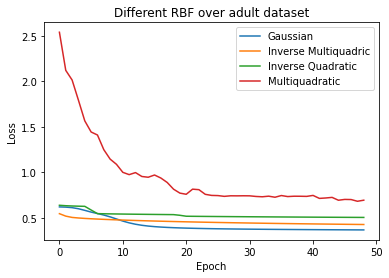

In [ ]:
folder = "./adult_result/"
fname = ["gaussian", "inverse_multiquadric","inverse_quadratic"]

folder = "./adult_result/"
lr1 = np.load(folder+'gaussian.npy')
lr2 = np.load(folder+'inverse_multiquadric.npy')
lr3 = np.load(folder+'inverse_quadratic.npy')
lr4 = np.load(folder+'multiquadratic.npy')

plt.plot(lr1[1:,1], label="Gaussian")
plt.plot(lr2[1:,1], label="Inverse Multiquadric")
plt.plot(lr3[1:,1], label="Inverse Quadratic")
plt.plot(lr4[1:,1], label="Multiquadratic")

plt.title("Different RBF over adult dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

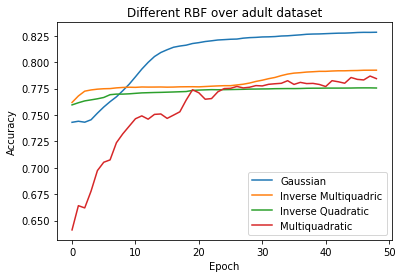

In [ ]:
folder = "./adult_result/"
fname = ["gaussian", "inverse_multiquadric","inverse_quadratic"]

folder = "./adult_result/"
lr1 = np.load(folder+'gaussian.npy')
lr2 = np.load(folder+'inverse_multiquadric.npy')
lr3 = np.load(folder+'inverse_quadratic.npy')
lr4 = np.load(folder+'multiquadratic.npy')

plt.plot(lr1[1:,0], label="Gaussian")
plt.plot(lr2[1:,0], label="Inverse Multiquadric")
plt.plot(lr3[1:,0], label="Inverse Quadratic")
plt.plot(lr4[1:,0], label="Multiquadratic")

plt.title("Different RBF over adult dataset")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###### Keras

In [ ]:
x_train = adult_train_data
y_train = adult_train_label
x_test = adult_test_data
y_test = adult_test_label

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.001, decay=0, momentum=0)
adam = optimizers.Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

batch_size = 16
epochs = 1000
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8390 - val_loss: 0.4997 - val_accuracy: 0.7326
Epoch 2/1000
2036/2036 [==============================] - 3s 2ms/step - loss: 0.3214 - accuracy: 0.8492 - val_loss: 0.5082 - val_accuracy: 0.7113
Epoch 3/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 0.3186 - accuracy: 0.8509 - val_loss: 0.5411 - val_accuracy: 0.7183
Epoch 4/1000
2036/2036 [==============================] - 3s 2ms/step - loss: 0.3160 - accuracy: 0.8537 - val_loss: 0.4769 - val_accuracy: 0.7354
Epoch 5/1000
2036/2036 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8532 - val_loss: 0.5300 - val_accuracy: 0.7303
Epoch 6/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8534 - val_loss: 0.5207 - val_accuracy: 0.7342
Epoch 7/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.8538 - val_loss: 0.5236 -

### Bike

In [ ]:
!mkdir bike_result

#### NN

In [ ]:
input_data = bike_train_data
target = bike_train_label

input_width = input_data.shape[1]

cy_bike_nn_model = sequential()
lr = 0.002
cy_bike_nn_model.add_fc(n_neuron=20, input_width=input_width, activation="relu")
cy_bike_nn_model.add_fc(n_neuron=10, activation="relu")
cy_bike_nn_model.add_fc(n_neuron=1, activation="linear")

cy_bike_nn_model.fit(input_data, target, max_iter=50, learning_rate=lr, batch_size=128, loss="mean_squared_error")

np.save('./bike_result/act_relu_'+str(lr),cy_bike_nn_model.history)

Iteration:0, Precision:0.0, Loss:0.29253205586152853
Iteration:1, Precision:0.0, Loss:0.2421774478587506
Iteration:2, Precision:0.0, Loss:0.22164439118824
Iteration:3, Precision:0.0, Loss:0.2070812253062254
Iteration:4, Precision:0.0, Loss:0.19545475698511647
Iteration:5, Precision:0.0, Loss:0.18548523410438975
Iteration:6, Precision:0.0, Loss:0.1782043196220378
Iteration:7, Precision:0.0, Loss:0.17232932650552873
Iteration:8, Precision:0.0, Loss:0.16328990871177554
Iteration:9, Precision:0.0, Loss:0.1569790681228704
Iteration:10, Precision:0.0, Loss:0.14976143704121067
Iteration:11, Precision:0.0, Loss:0.13979366802563017
Iteration:12, Precision:0.0, Loss:0.13178732765345363
Iteration:13, Precision:0.0, Loss:0.12264511713644749
Iteration:14, Precision:0.0, Loss:0.11776759560440712
Iteration:15, Precision:0.0, Loss:0.11356754521235682
Iteration:16, Precision:0.0, Loss:0.10987061699267361
Iteration:17, Precision:0.0, Loss:0.10767567761934503
Iteration:18, Precision:0.0, Loss:0.104408157

In [ ]:
input_data = bike_train_data
target = bike_train_label * bike_standard[-1] + bike_mean[-1]

predict = cy_bike_nn_model.predict(input_data)

predict = predict * bike_standard[-1] + bike_mean[-1]
predict = np.where(predict<0,1e-9,predict)
predict = np.squeeze(predict)

# RMSLE
print(rmsle(predict,target))

0.7351133247280404


In [ ]:
input_data = bike_test_data
target = bike_test_label

predict = cy_bike_nn_model.predict(input_data)

predict = predict * bike_standard[-1] + bike_mean[-1]
predict = np.where(predict<0,1e-9,predict)
predict = np.squeeze(predict)

# RMSLE
print(rmsle(predict,target))

0.7534394317488702


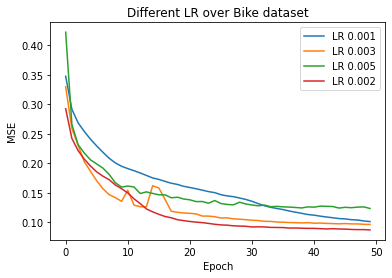

In [ ]:
folder = "./bike_result/"
lr1 = np.load(folder+'act_relu_0.001.npy')
lr2 = np.load(folder+'act_relu_0.003.npy')
lr3 = np.load(folder+'act_relu_0.005.npy')
lr4 = np.load(folder+'act_relu_0.002.npy')

plt.plot(lr1[:,1], label="LR 0.001")
plt.plot(lr2[:,1], label="LR 0.003")
plt.plot(lr3[:,1], label="LR 0.005")
plt.plot(lr4[:,1], label="LR 0.002")

plt.title("Different LR over Bike dataset")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

#### RBFN

In [ ]:
input_data = bike_train_data
target = bike_train_label

In [ ]:
center, sigma = k_means(input=input_data, max_k=300, max_iter=50, threshold=0.1, min_size=5)

Start K-means, initial center: 300
Performing K-means Iteration 1
Performing K-means Iteration 2
Performing K-means Iteration 3
Performing K-means Iteration 4
Performing K-means Iteration 5
Performing K-means Iteration 6
Performing K-means Iteration 7
Performing K-means Iteration 8
Performing K-means Iteration 9
Performing K-means Iteration 10
Performing K-means Iteration 11
Performing K-means Iteration 12
Performing K-means Iteration 13
Performing K-means Iteration 14
Performing K-means Iteration 15
Performing K-means Iteration 16
K-means converges at iter16
Remove zero sigma cluster, remaining cluster: 300


In [ ]:
cy_bike_rbf_model = sequential()
RBF="inverse_quadratic"
cy_bike_rbf_model.add_rbf(RBF=RBF, center=center, sigma=sigma, c_lr=1, s_lr=1);
cy_bike_rbf_model.add_fc(n_neuron=1, activation="linear")
lr = 0.01
cy_bike_rbf_model.fit(input_data, target, max_iter=50, learning_rate=lr, batch_size=128, loss="mean_squared_error",accuracy="skip")

np.save('./bike_result/rbf_'+RBF,cy_bike_rbf_model.history)

Iteration:0, Precision:0.0, Loss:0.46865534590241437
Iteration:1, Precision:0.0, Loss:0.3950543225415068
Iteration:2, Precision:0.0, Loss:0.359778392166846
Iteration:3, Precision:0.0, Loss:0.33522648428511254
Iteration:4, Precision:0.0, Loss:0.32222619390057733
Iteration:5, Precision:0.0, Loss:0.3135009575533577
Iteration:6, Precision:0.0, Loss:0.306260014066581
Iteration:7, Precision:0.0, Loss:0.30198836673171875
Iteration:8, Precision:0.0, Loss:0.300085929577023
Iteration:9, Precision:0.0, Loss:0.29883003669717206
Iteration:10, Precision:0.0, Loss:0.29774497817918516
Iteration:11, Precision:0.0, Loss:0.29679409703764925
Iteration:12, Precision:0.0, Loss:0.29595241205374195
Iteration:13, Precision:0.0, Loss:0.2952016572386225
Iteration:14, Precision:0.0, Loss:0.2945309325602032
Iteration:15, Precision:0.0, Loss:0.293933312875713
Iteration:16, Precision:0.0, Loss:0.2934019870911091
Iteration:17, Precision:0.0, Loss:0.2929283887684505
Iteration:18, Precision:0.0, Loss:0.2925028392141647

In [ ]:
input_data = bike_train_data
target = bike_train_label * bike_standard[-1] + bike_mean[-1]

predict = cy_bike_rbf_model.predict(input_data)

predict = predict * bike_standard[-1] + bike_mean[-1]
predict = np.where(predict<0,1e-9,predict)
predict = np.squeeze(predict)

# RMSLE
print(rmsle(predict,target))

1.2483570126343675


In [ ]:
input_data = bike_test_data
target = bike_test_label

predict = cy_bike_rbf_model.predict(input_data)

predict = predict * bike_standard[-1] + bike_mean[-1]
predict = np.where(predict<0,1e-9,predict)
predict = np.squeeze(predict)

# RMSLE
print(rmsle(predict,target))

1.268616285244867


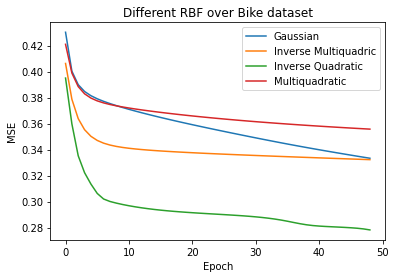

In [ ]:
folder = "./bike_result/"
lr1 = np.load(folder+'rbf_gaussian.npy')
lr2 = np.load(folder+'rbf_IMQ.npy')
lr3 = np.load(folder+'rbf_inverse_quadratic.npy')
lr4 = np.load(folder+'rbf_multiquadratic.npy')

plt.plot(lr1[1:,1], label="Gaussian")
plt.plot(lr2[1:,1], label="Inverse Multiquadric")
plt.plot(lr3[1:,1], label="Inverse Quadratic")
plt.plot(lr4[1:,1], label="Multiquadratic")

plt.title("Different RBF over Bike dataset")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()